### Linear regression model to predict the salary based on the employees year of work exprience

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
import warnings
warnings.filterwarnings(action="ignore",category = FutureWarning)

### Loading the dataset

In [2]:
df = pd.read_csv("Salary_Data.csv")

In [3]:
df.head(7)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0


In [4]:
df.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


### Checking null values

In [5]:
df.isnull().sum(axis = 0)

YearsExperience    0
Salary             0
dtype: int64

### Tain and test split

In [6]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [7]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [8]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

### Splitting the data set into training and testing set

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 1/3,random_state=42)

In [10]:
X_train

array([[ 2.2],
       [ 5.1],
       [ 2.9],
       [ 4.1],
       [ 4. ],
       [ 7.9],
       [ 1.3],
       [ 1.5],
       [ 9. ],
       [ 2. ],
       [ 7.1],
       [ 9.5],
       [ 5.9],
       [10.5],
       [ 6.8],
       [ 3.2],
       [ 3.9],
       [ 4.5],
       [ 6. ],
       [ 3. ]])

In [11]:
X_test

array([[ 9.6],
       [ 4.9],
       [ 8.2],
       [ 5.3],
       [ 3.2],
       [ 3.7],
       [10.3],
       [ 8.7],
       [ 4. ],
       [ 1.1]])

In [12]:
y_train

array([ 39891.,  66029.,  56642.,  57081.,  55794., 101302.,  46205.,
        37731., 105582.,  43525.,  98273., 116969.,  81363., 121872.,
        91738.,  54445.,  63218.,  61111.,  93940.,  60150.])

In [13]:
y_test

array([112635.,  67938., 113812.,  83088.,  64445.,  57189., 122391.,
       109431.,  56957.,  39343.])

In [14]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

### Getting the predictions from the train model

In [15]:
y_pred = regressor.predict(X_test)

In [16]:
y_pred.shape

(10,)

In [17]:
y_pred

array([115814.30756236,  71511.92534771, 102617.85328566,  75282.34085534,
        55487.65944028,  60200.67882482, 122412.53470072, 107330.8726702 ,
        63028.49045554,  35692.97802523])

In [18]:
y_test

array([112635.,  67938., 113812.,  83088.,  64445.,  57189., 122391.,
       109431.,  56957.,  39343.])

In [19]:
r2 = r2_score(y_test,y_pred)
r2

0.9553063138044949

## Visualise the test set results 

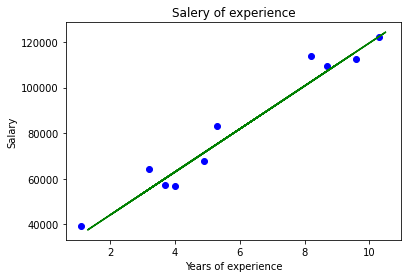

In [20]:
plt.scatter(X_test,y_test,color = "b")
plt.plot(X_train,regressor.predict(X_train),color = "g")
plt.title("Salery of experience")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

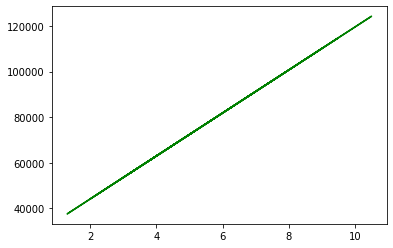

In [21]:
plt.plot(X_train,regressor.predict(X_train),color = "g")
plt.show()

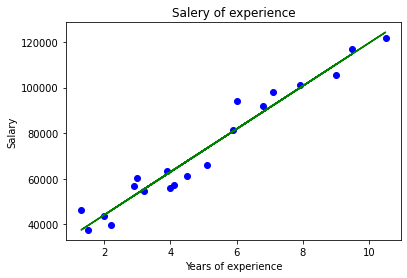

In [22]:
plt.scatter(X_train,y_train,color = "b")
plt.plot(X_train,regressor.predict(X_train),color = "g")
plt.title("Salery of experience")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

In [23]:
y_test

array([112635.,  67938., 113812.,  83088.,  64445.,  57189., 122391.,
       109431.,  56957.,  39343.])

In [24]:
print(regressor.intercept_)
print(regressor.coef_)

25324.33537924433
[9426.03876907]


In [25]:
print('Mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean absolute error: 4956.5232614449005
Mean Squared Error: 35301898.887134895
Root mean squared error: 5941.540110706558
